In [4]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


In [7]:
# Загрузка данных (замените на путь к вашему файлу)
file_path = "Statistic.csv"  # Путь к вашему CSV файлу

# Пробуем загрузить данные с корректировкой разделителя и кодировки
try:
    # Указываем разделитель, кодировку и обработку ошибок
    df = pd.read_csv(file_path, sep=';', encoding='utf-8', on_bad_lines='skip', skip_blank_lines=True)

    # Убираем пробелы в названиях столбцов
    df.columns = df.columns.str.strip()

    # Отображаем первые несколько строк данных
    print(df.head())
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")


       Отметка времени           Цвет          Настроение Уверенность  \
0  19.11.2024 15:51:37          Белый  10 - Очень хорошее          Да   
1  19.11.2024 15:52:46         Черный                   7          Да   
2  19.11.2024 15:54:16  Черный, Белый                   7          Да   
3  19.11.2024 16:04:19  Черный, Белый                   6         Нет   
4  19.11.2024 16:22:49         Черный         5 - Среднее          Да   

   Если ответили "Да"  Если ответили "Нет" Возраст      Пол        События  
0                  10                    4   18–25  Женщина        Работа   
1                  10                    1   18–25  Женщина     Свидания 😁  
2                   5                    1   18–25  Женщина  Работа, учеба  
3                   8                    3   18–25  Женщина         Учеба   
4                  10                    1   18–25  Мужчина  Особо не было  


In [9]:
# Выбираем только числовые столбцы для статистики
numeric_columns = df.select_dtypes(include=['number']).columns

# Основные статистические показатели
descriptive_stats = df[numeric_columns].describe()

# Мода
mode_values = df[numeric_columns].mode()

# Стандартное отклонение и дисперсия
std_deviation = df[numeric_columns].std()
variance = df[numeric_columns].var()

# Выводим результаты
print("Описательная статистика:")
print(descriptive_stats)
print("\nМодальные значения:")
print(mode_values)
print("\nСтандартное отклонение:")
print(std_deviation)
print("\nДисперсия:")
print(variance)


Описательная статистика:
       Если ответили "Да"  Если ответили "Нет"
count           50.000000             50.00000
mean             7.200000              2.16000
std              2.842821              2.23479
min              1.000000              1.00000
25%              6.000000              1.00000
50%              8.000000              1.00000
75%             10.000000              2.75000
max             10.000000             10.00000

Модальные значения:
   Если ответили "Да"  Если ответили "Нет"
0                  10                    1

Стандартное отклонение:
Если ответили "Да"     2.842821
Если ответили "Нет"    2.234790
dtype: float64

Дисперсия:
Если ответили "Да"     8.081633
Если ответили "Нет"    4.994286
dtype: float64


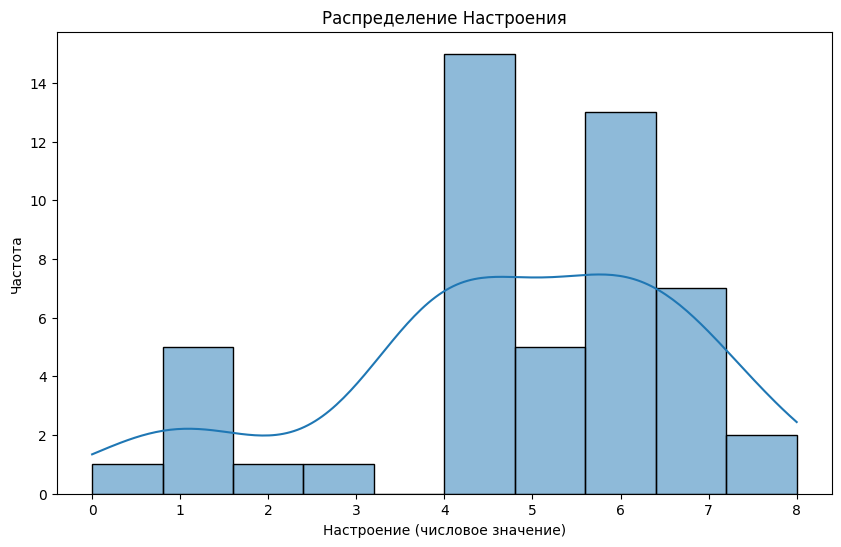


Тест Шапиро-Уилка для нормальности:
Статистика: 0.9122924846938956, p-значение: 0.0012555891482721726


In [12]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем столбец 'Настроение' в числовые значения
le = LabelEncoder()
df['Настроение_числовое'] = le.fit_transform(df['Настроение'].fillna('Неизвестно'))

# Построение гистограммы для столбца 'Настроение_числовое'
plt.figure(figsize=(10, 6))
sns.histplot(df['Настроение_числовое'], kde=True, bins=10)
plt.title('Распределение Настроения')
plt.xlabel('Настроение (числовое значение)')
plt.ylabel('Частота')
plt.show()

# Теперь выполняем тест на нормальность (Тест Шапиро-Уилка) для числового столбца
shapiro_stat, shapiro_p_value = stats.shapiro(df['Настроение_числовое'].dropna())

# Выводим результаты
print("\nТест Шапиро-Уилка для нормальности:")
print(f"Статистика: {shapiro_stat}, p-значение: {shapiro_p_value}")



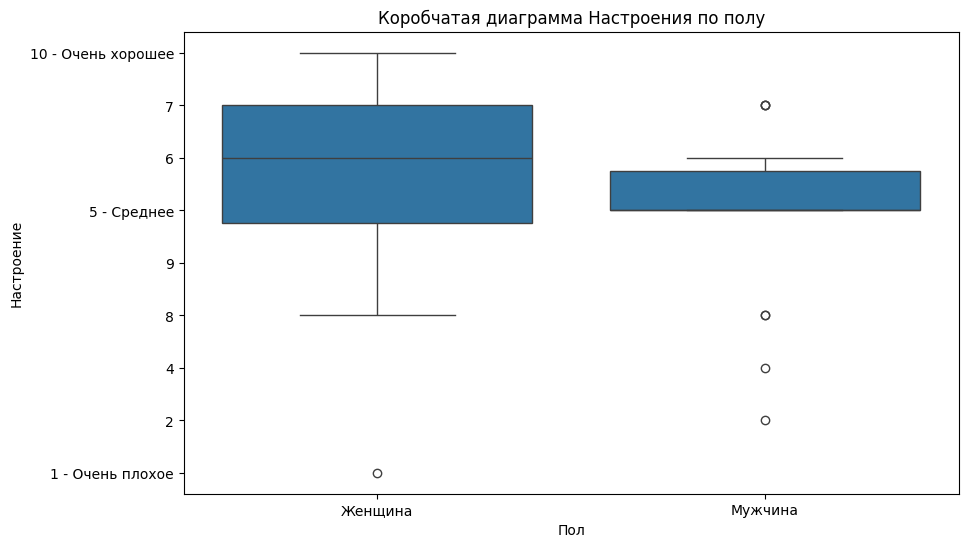

In [15]:
# 5. Коробчатая диаграмма (для визуализации распределения по категориям, например, по полу)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Пол', y='Настроение', data=df)
plt.title('Коробчатая диаграмма Настроения по полу')
plt.xlabel('Пол')
plt.ylabel('Настроение')
plt.show()

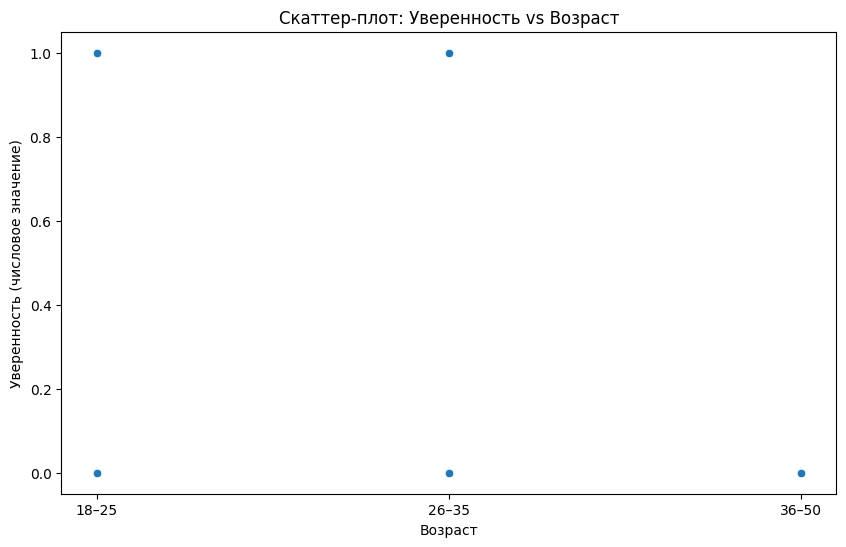

In [23]:
le = LabelEncoder()
df['Уверенность_числовое'] = le.fit_transform(df['Уверенность'].fillna('Неизвестно'))
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Возраст'], y=df['Уверенность_числовое'])
plt.title('Скаттер-плот: Уверенность vs Возраст')
plt.xlabel('Возраст')
plt.ylabel('Уверенность (числовое значение)')
plt.show()


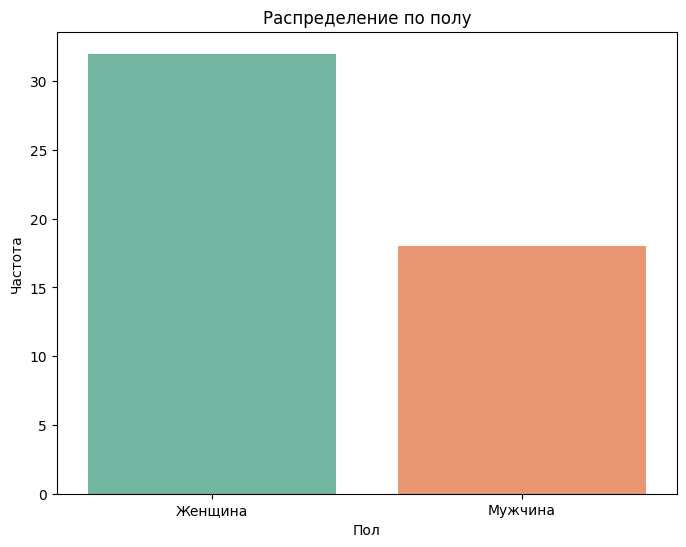

In [27]:
# Убираем пробелы в названиях столбцов
df.columns = df.columns.str.strip()

# Столбчатая диаграмма для анализа количества мужчин и женщин
plt.figure(figsize=(8, 6))
sns.countplot(x='Пол', data=df, hue='Пол', palette='Set2', legend=False)
plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Частота')
plt.show()


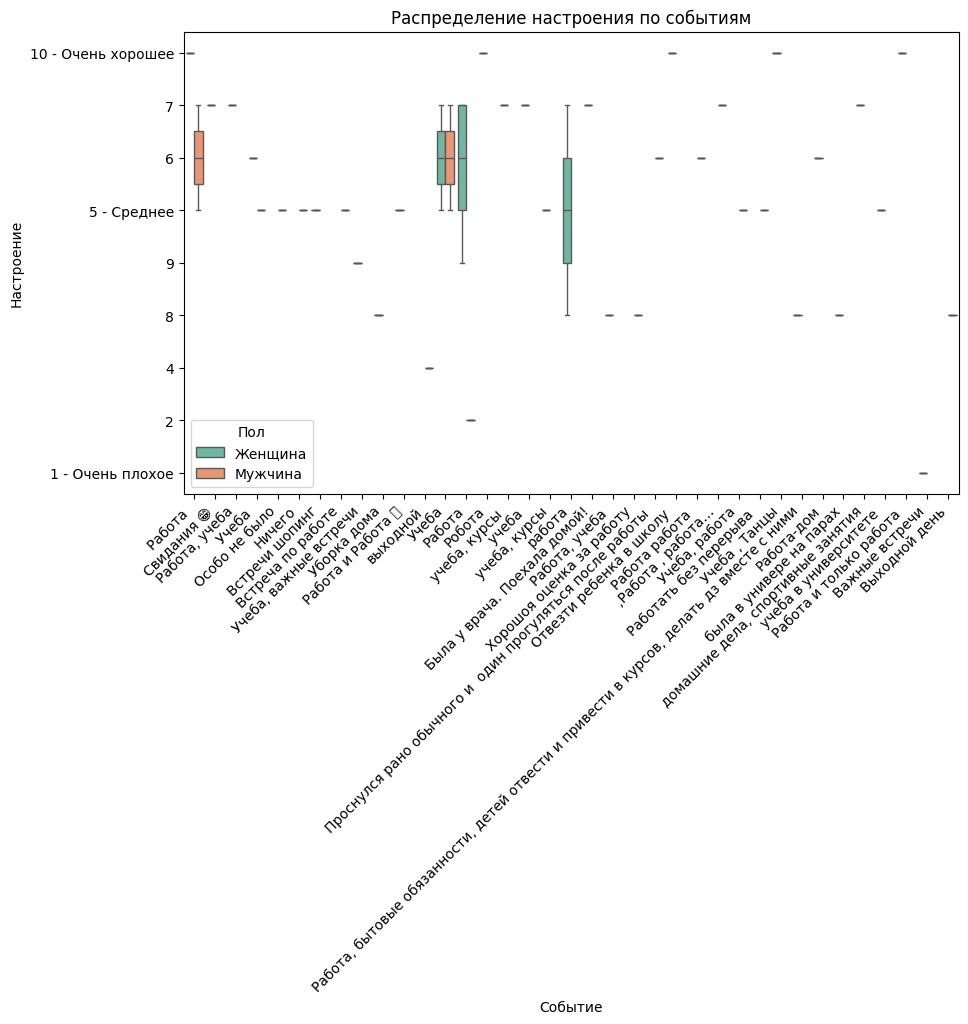

In [35]:
# Анализ настроения по событиям
import warnings

# Игнорируем предупреждения
warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*')
plt.figure(figsize=(10, 6))
sns.boxplot(x='События', y='Настроение', data=df, palette='Set2', hue='Пол')  # Добавил hue='Пол' для разделения по полу
plt.title('Распределение настроения по событиям')
plt.xlabel('Событие')
plt.ylabel('Настроение')
plt.xticks(rotation=45, ha='right')
plt.show()


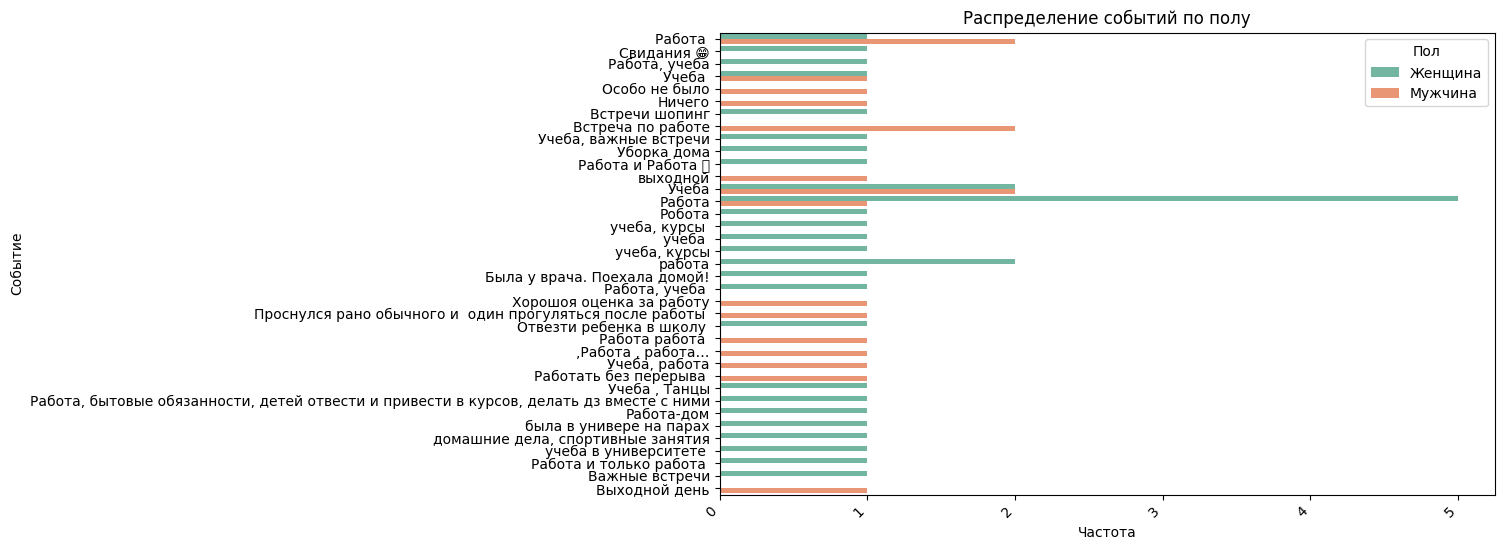

In [34]:
# Анализ событий по полу
import warnings

# Игнорируем предупреждения
warnings.filterwarnings('ignore', category=UserWarning, message='.*Glyph.*')



plt.figure(figsize=(10, 6))
sns.countplot(y='События', data=df, hue='Пол', palette='Set2')
plt.title('Распределение событий по полу')
plt.xlabel('Частота')
plt.ylabel('Событие')
plt.xticks(rotation=45, ha='right')  # Добавим поворот оси x, если нужны метки
plt.show()
